# 1. 필요한 라이브러리 로드

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# 2. 데이터 로드

In [3]:
df = pd.read_csv(r"C:\Users\user\OneDrive\문서\과제\2025-1\캡스톤 디자인\final_data.csv")
df.head()

,item_id,rating,summary,text,title
0,B000063W1R,5.0,One of my favorites!,This is one of my all-time favorite movies for...,The Count of Monte Cristo [Region 2]
1,B000063W1R,5.0,GREAT movie,LOVE this movie - loved it when it first came ...,The Count of Monte Cristo [Region 2]
2,B000063W1R,5.0,"I love a well rounded movie, don't you?",This movie has everything I like: a great stor...,The Count of Monte Cristo [Region 2]
3,B000063W1R,5.0,The Count of Monte Cristo (Blu-ray),Great Blu-ray DVD for the price! The graphic ...,The Count of Monte Cristo [Region 2]
4,B000063W1R,4.0,"Revenge, served by Jim Cavizel","I love this movie! Sure, the acting isn't osca...",The Count of Monte Cristo [Region 2]


# 3. EDA

In [5]:
# 1. 데이터프레임 기본 구조 확인
print("데이터프레임 형태:", df.shape)
print("\n컬럼별 데이터 타입:")
print(df.dtypes)

# 2. 결측치 확인
print("\n컬럼별 결측치 개수:")
print(df.isnull().sum())

데이터프레임 형태: (1262842, 5)

컬럼별 데이터 타입:
item_id     object
rating     float64
summary     object
text        object
title       object
dtype: object

컬럼별 결측치 개수:
item_id    0
rating     0
summary    0
text       0
title      0
dtype: int64


In [6]:
# 3. 주요 컬럼의 유니크 값 개수
print("\n영화 수 (item_id 기준):", df['item_id'].nunique())
print("영화 제목 수 (title 기준):", df['title'].nunique())
print("리뷰 수:", len(df))


영화 수 (item_id 기준): 70573
영화 제목 수 (title 기준): 69317
리뷰 수: 1262842


In [ ]:
# 4. 제목 정규화 진행(소문자)
df['title_clean'] = df['title'].str.strip().str.lower()
print("정규화한 제목 수:", df['title_clean'].nunique())

정규화한 제목 수: 69273


In [ ]:
# 4. 제목 정규화 진행(태그 떼기)

def clean_edition(title):
    return re.sub(r'\[.*?\]', '', title).strip()

df['title_basic'] = df['title_clean'].apply(clean_edition)
print("에디션 제거 후 제목 수:", df['title_basic'].nunique())

에디션 제거 후 제목 수: 67612


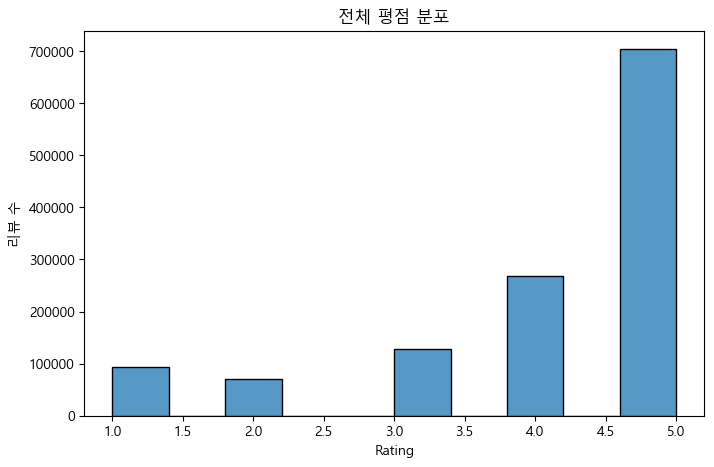

1.0     93141
2.0     71403
3.0    127353
4.0    267236
5.0    703709
Name: rating, dtype: int64


In [ ]:
# 5. 평점에 따른 리뷰 수 시각화

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title("전체 평점 분포")
plt.xlabel("Rating")
plt.ylabel("리뷰 수")
plt.show()

print(df['rating'].value_counts().sort_index())


In [ ]:
# 6. 리뷰 수 상위 10개 영화 평균평점
movie_stats = df.groupby('title_basic').agg(
    rating_mean=('rating', 'mean'),
    rating_count=('rating', 'count')
).sort_values(by='rating_count', ascending=False)

print(movie_stats.head(10))  # 리뷰 수 기준 상위 10개 영화

                                       rating_mean  rating_count
title_basic                                                     
the village                               3.313823          1606
the big lebowski                          4.420455          1584
babel                                     3.249377          1203
dawn of the dead                          4.310282          1099
memento                                   4.287335          1058
the 10th kingdom                          4.594118          1020
secondhand lions                          4.648221          1012
run lola run                              4.588785           963
iron man (ultimate 2 disc edition)        4.450811           925
cars (single-disc widescreen edition)     4.586475           902


In [ ]:
# 7. 리뷰 수가 100개 이상인 영화 중 평균 평점 높은 상위 10개
popular_highly_rated = movie_stats[movie_stats['rating_count'] >= 100]\
    .sort_values(by='rating_mean', ascending=False).head(10)

print(popular_highly_rated)

                                                    rating_mean  rating_count
title_basic                                                                  
food production systems for a backyard or small...     4.964286           224
the umbrellas of cherbourg                             4.953846           130
9/11 - the filmmakers' commemorative edition           4.951613           248
martin - the complete first season                     4.947712           153
third watch: season 1                                  4.947214           341
arrested development: season 2                         4.940426           235
the color of paradise                                  4.916667           120
electric dreams                                        4.916667           144
scarecrow and mrs. king: season 1                      4.916201           358
scrubs - the complete first season                     4.914815           270


- 영화 id 수와 영화 제목 수가 불일치 하는 것을 확인.      
&rightarrow; 고전 영화들 영향으로 추정.

# 4. text 분석